🎯 Desafio dia 87 — Monitoramento de Atividade Física

📂 Dataset: desafio_dia_87_atividade_fisica.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Uma startup de saúde deseja entender os hábitos de atividade física dos usuários do seu app, incluindo dados como tipo de exercício, duração e gasto calórico. Os dados também são segmentados por faixa etária e sexo.

🛠️ Tarefas do desafio

🧹 Tratamento de dados
- Preencha os valores ausentes em duracao_min com a média.

- Preencha os valores ausentes em calorias_gastas com a mediana.

📊 Análise geral
- Qual é o tipo de atividade mais comum entre os usuários?

- Qual a média de calorias gastas por faixa etária?

📈 Visualização de dados
- Crie um gráfico de barras empilhadas mostrando a quantidade de atividades registradas por sexo e tipo de atividade.

🤖 Machine Learning - Regressão
- Crie um modelo para prever o valor de calorias_gastas com base em:

sexo, faixa_idade, atividade, duracao_min

Use:

train_test_split

get_dummies

RandomForestRegressor

Avalie com mean_squared_error.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("desafio_dia_87_atividade_fisica (1).csv")
df.head()

,id_usuario,sexo,faixa_idade,atividade,duracao_min,calorias_gastas
0,5486,Feminino,36-45,Yoga,77.1,409.5
1,5333,Outro,46-60,Caminhada,46.9,339.6
2,5699,Outro,60+,Corrida,58.0,549.7
3,5143,Masculino,36-45,Bicicleta,38.8,455.4
4,5251,Feminino,18-25,Corrida,43.7,320.7


In [4]:
#Preencha os valores ausentes em duracao_min com a média.
df["duracao_min"] = df["duracao_min"].fillna(df["duracao_min"].mean())
df["duracao_min"].isna().sum()

0

In [5]:
#Preencha os valores ausentes em calorias_gastas com a mediana.
df["calorias_gastas"] = df["calorias_gastas"].fillna(df["calorias_gastas"].mean())
df["calorias_gastas"].isna().sum()

0

In [8]:
#Qual é o tipo de atividade mais comum entre os usuários?
atividade_comum_usuarios = df["atividade"].value_counts()
print(atividade_comum_usuarios)

atividade
Corrida       100
Bicicleta      91
Caminhada      90
Yoga           77
Musculação     76
Outros         66
Name: count, dtype: int64


In [17]:
#Qual a média de calorias gastas por faixa etária?
calorias_gastas_faixa_etaria = df.groupby("faixa_idade")["calorias_gastas"].mean()
print(calorias_gastas_faixa_etaria.round(2))

faixa_idade
18-25    352.13
26-35    352.23
36-45    360.99
46-60    336.92
60+      362.84
Name: calorias_gastas, dtype: float64


Text(0, 0.5, 'Quantidade')

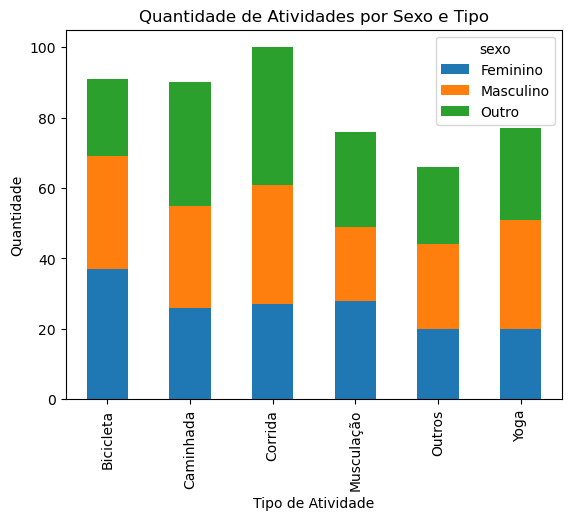

In [29]:
#Crie um gráfico de barras empilhadas mostrando a quantidade de atividades registradas por sexo e tipo de atividade.
grafico = pd.crosstab(df["atividade"], df["sexo"])
grafico.plot(kind="bar", stacked=True)
plt.title("Quantidade de Atividades por Sexo e Tipo")
plt.xlabel("Tipo de Atividade")
plt.ylabel("Quantidade")

In [32]:
#Crie um modelo para prever o valor de calorias_gastas com base em:
X = df[["sexo", "faixa_idade", "atividade", "duracao_min"]]
y = df["calorias_gastas"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

10663.659540555655
